# LCO Data Notebook

Using this notebook as the go-to place for quick-look at LCO photometry (and potentially for reductions)

In [119]:
import astropy.io.fits as fits
import pylab as plt
%matplotlib inline
import numpy as np
import glob
from astropy.time import Time
import pandas as pd
%load_ext autoreload
%autoreload 2
import lcoDD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Downloading Images

Getting all new files from LCO with an adapted modular script of https://github.com/nespinoza/lcogtDD .

Using 'user' means that username and password require input from the ipynb.

In [120]:
lcoDD.run_dl(None,None,'LCO2017AB-003','./images/','user')

	 > Checking data from 2017-08-15 to 2017-08-21...

Username:hugh_osborn
password:········
	 > Proposals from which data will be fetched:  LCO2017AB-003
	 > Frames identified for the 2017-08-16/2017-08-17 period. Checking frames...
	   Final count: 24 identified frames, downloaded 0 new ones.
	 > Frames identified for the 2017-08-17/2017-08-18 period. Checking frames...
	   Final count: 24 identified frames, downloaded 0 new ones.
	 > Frames identified for the 2017-08-19/2017-08-20 period. Checking frames...
	   + File coj0m405-kb97-20170819-0529-e91.fits.fz not found on ./images//raw/20170819/.
	   + File coj0m405-kb97-20170819-0528-e91.fits.fz not found on ./images//raw/20170819/.
	   + File coj0m405-kb97-20170819-0527-e91.fits.fz not found on ./images//raw/20170819/.
	   + File coj0m405-kb97-20170819-0526-e91.fits.fz not found on ./images//raw/20170819/.
	   + File coj0m405-kb97-20170819-0525-e91.fits.fz not found on ./images//raw/20170819/.
	   + File coj0m405-kb97-20170819-0524-e9

Defining some classes for image and the full photometry data.

    If I'm honest, I'm still not entirely sure what classes are for, only that they're *better python*...

In [247]:
class image(object):
    '''
    The image class for a single LCO image. Loaded using the fits file (and filename).
    Selected header key words are stored (time,filter,ra,dec,defocussing,exptime,site), 
    as is the image itself, a derived name (PDS110_JD7999_SDSS_u) and the filename.'''
    def __init__(self,fi,filename=''):
        self.time=Time(fi[1].header['DATE-OBS'],format='isot')
        self.filt=fi[1].header['FILTERI1']
        self.ra=fi[1].header['RA']
        self.dec=fi[1].header['DEC']
        self.defoc=fi[1].header['FOCFLOFF']
        self.exptime=fi[1].header['EXPTIME']
        self.site=fi[1].header['SITEID']
        self.img=fi[1].data
        self.name="PDS110_JD"+str(np.round(self.time.jd-2450000,4))+"_"+str(self.filt)
        self.filename=filename
        self.targ_pix=(fi[1].header['CRPIX1'],fi[1].header['CRPIX2'])
        self.pixscale=1.1600000
        self.skymag=fi[1].header['WMSSKYBR']
    def plot(self,n=0):
        #Plotting with imshow. 
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(self.img)))
    def plot_cut(self,n=0):
        #Plotting with lowest 50% and highest 0.2% values cut
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(np.clip(self.img,np.percentile(self.img,50),np.percentile(self.img,99.8))),k=3))
    def getdic(self):
        #Collecting self values from image into dictionary
        dic={key:value for key, value in self.__dict__.items() if not key.startswith('__') and not callable(key)}
        return dic
        
class photometry(object):
    '''
    The class containing all images from a campaign, stored in a pandas dataframe.
    To add images, use add_img(Image).'''
    def __init__(self):
        self.dic=pd.DataFrame([])
        self.imgs=[]
    def add_img(self,img):
        #Adds image to stored dataframe
        ser=pd.Series(img.getdic(),name=img.name)
        self.dic=self.dic.append(ser)
    def stack_same_imgs():
        return None
    def aperture_photometry():
        return None
    def is_in(self,fname):
        return fname in self.dic.filename.values

def plot_lco(arr,ax,clip0=80,clip1=99.9):
    #Plot any and all 2D array of images. Copied from the image class to be honest.
    return ax.imshow(np.rot90(np.log10(np.clip(arr,np.percentile(arr,clip0),np.percentile(arr,clip1))),k=3))


In [248]:
def input_photometry(phot):
    '''#Assembling the downloaded photometry from LCO (in images/raw/) and adding to a photometry object.
    '''
    import os
    file_list = []
    for dirpath,_,filenames in os.walk('./images/raw/'):
        for name in filenames:
            if name.endswith('.fits.fz'):
                f=os.path.join(dirpath,name)
                if phot.dic.shape[0]==0 or not phot.is_in(f):
                    print(f)
                    file_list.append(f)
                    phot.add_img(image(fits.open(f),f))
    return phot

### Compiling photometry

In [249]:
phot=input_photometry(photometry())

./images/raw/20170815/ogg0m404-kb82-20170815-1153-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1154-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1155-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1156-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1157-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1158-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1159-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1160-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1161-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1162-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1163-e91.fits.fz
./images/raw/20170815/ogg0m404-kb82-20170815-1164-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0389-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0390-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0391-e91.fits.fz
./images/raw/20170816/coj0m403-kb98-20170816-0392-e91.fits.fz
./images

In [100]:
phot.dic

dec  defoc  exptime  \
PDS110_JD7982.1287_SDSS-UP-124   -01:10:23.83    0.0   29.937   
PDS110_JD7982.1291_SDSS-UP-124   -01:10:23.54    0.0   29.942   
PDS110_JD7982.1296_SDSS-UP-124   -01:10:23.62    0.0   29.938   
PDS110_JD7982.1302_SDSS-GP-124  -01:10:22.311    0.0    9.946   
PDS110_JD7982.1304_SDSS-GP-124  -01:10:22.184    0.0    9.947   
PDS110_JD7982.1306_SDSS-GP-124  -01:10:22.324    0.0    9.931   
PDS110_JD7982.131_SDSS-RP-124   -01:10:22.296    0.0   11.938   
PDS110_JD7982.1312_SDSS-RP-124  -01:10:22.315    0.0   11.938   
PDS110_JD7982.1315_SDSS-RP-124  -01:10:22.114    0.0   11.941   
PDS110_JD7982.1319_PSTR-ZS-124  -01:10:21.084    0.0   13.937   
PDS110_JD7982.1321_PSTR-ZS-124  -01:10:20.934    0.0   13.943   
PDS110_JD7982.1324_PSTR-ZS-124  -01:10:20.747    0.0   13.934   
PDS110_JD7982.3128_SDSS-UP-124   -01:10:23.84   -1.0   30.286   
PDS110_JD7982.3132_SDSS-UP-124   -01:10:23.55   -1.0   30.291   
PDS110_JD7982.3137_SDSS-UP-124   -01:10:23.86   -1.0   30.286   
PDS110_JD7982.3144_SDSS-GP-124  -01:10:56.009   -1.0   10.290   
PDS110_JD7982.3146_SDSS-GP-124  -01:10:55.950   -1.0   10.293   
PDS110_JD7982.3148_SDSS-GP-124  -01:10:55.473   -1.0   10.292   
PDS110_JD7982.3151_SDSS-RP-124  -01:10:54.865   -1.0   12.291   
PDS110_JD7982.3154_SDSS-RP-124  -01:10:54.626   -1.0   12.287   
PDS110_JD7982.3156_SDSS-RP-124  -01:10:54.736   -1.0   12.288   
PDS110_JD7982.316_PSTR-ZS-124   -01:10:55.004   -1.0   14.281   
PDS110_JD7982.3163_PSTR-ZS-124  -01:10:54.866   -1.0   14.290   
PDS110_JD7982.3165_PSTR-ZS-124  -01:10:55.104   -1.0   14.291   
PDS110_JD7983.1287_SDSS-UP-124   -01:10:23.69    0.0   29.935   
PDS110_JD7983.1292_SDSS-UP-124   -01:10:23.65    0.0   29.936   
PDS110_JD7983.1296_SDSS-UP-124   -01:10:23.65    0.0   29.943   
PDS110_JD7983.1302_SDSS-GP-124  -01:10:18.618    0.0    9.942   
PDS110_JD7983.1305_SDSS-GP-124  -01:10:18.974    0.0    9.943   
PDS110_JD7983.1307_SDSS-GP-124  -01:10:19.079    0.0    9.942   
PDS110_JD7983.131_SDSS-RP-124   -01:10:19.375    0.0   11.935   
PDS110_JD7983.1312_SDSS-RP-124  -01:10:19.082    0.0   11.938   
PDS110_JD7983.1315_SDSS-RP-124  -01:10:19.197    0.0   11.938   
PDS110_JD7983.1319_PSTR-ZS-124  -01:10:18.749    0.0   13.952   
PDS110_JD7983.1322_PSTR-ZS-124  -01:10:18.601    0.0   13.940   
PDS110_JD7983.1324_PSTR-ZS-124  -01:10:18.819    0.0   13.945   
PDS110_JD7983.2885_SDSS-UP-124   -01:10:23.48   -1.0   30.286   
PDS110_JD7983.2889_SDSS-UP-124   -01:10:23.68   -1.0   30.276   
PDS110_JD7983.2894_SDSS-UP-124   -01:10:23.75   -1.0   30.283   
PDS110_JD7983.29_SDSS-GP-124    -01:10:30.456   -1.0    7.284   
PDS110_JD7983.2901_SDSS-GP-124  -01:10:30.562   -1.0    7.291   
PDS110_JD7983.2903_SDSS-GP-124  -01:10:30.500   -1.0    7.277   
PDS110_JD7983.2906_SDSS-RP-124  -01:10:31.436   -1.0    9.276   
PDS110_JD7983.2909_SDSS-RP-124  -01:10:30.935   -1.0    9.292   
PDS110_JD7983.2911_SDSS-RP-124  -01:10:30.887   -1.0    9.291   
PDS110_JD7983.2914_PSTR-ZS-124  -01:10:30.637   -1.0   14.283   
PDS110_JD7983.2917_PSTR-ZS-124  -01:10:30.757   -1.0   14.285   
PDS110_JD7983.2919_PSTR-ZS-124  -01:10:30.968   -1.0   14.282   
PDS110_JD7983.1292_SDSS-UP-124   -01:10:23.65    0.0   29.936   

                                                                         filename  \
PDS110_JD7982.1287_SDSS-UP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1291_SDSS-UP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1296_SDSS-UP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1302_SDSS-GP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1304_SDSS-GP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1306_SDSS-GP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.131_SDSS-RP-124   ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1312_SDSS-RP-124  ./images/raw/20170815/ogg0m404-kb82-20170815-1...   
PDS110_JD7982.1315_SDSS-RP

### Plotting images
Lets plot stacked version of images in each filter.

These initial images have varying defocussing, and the field re-alignment is poor.

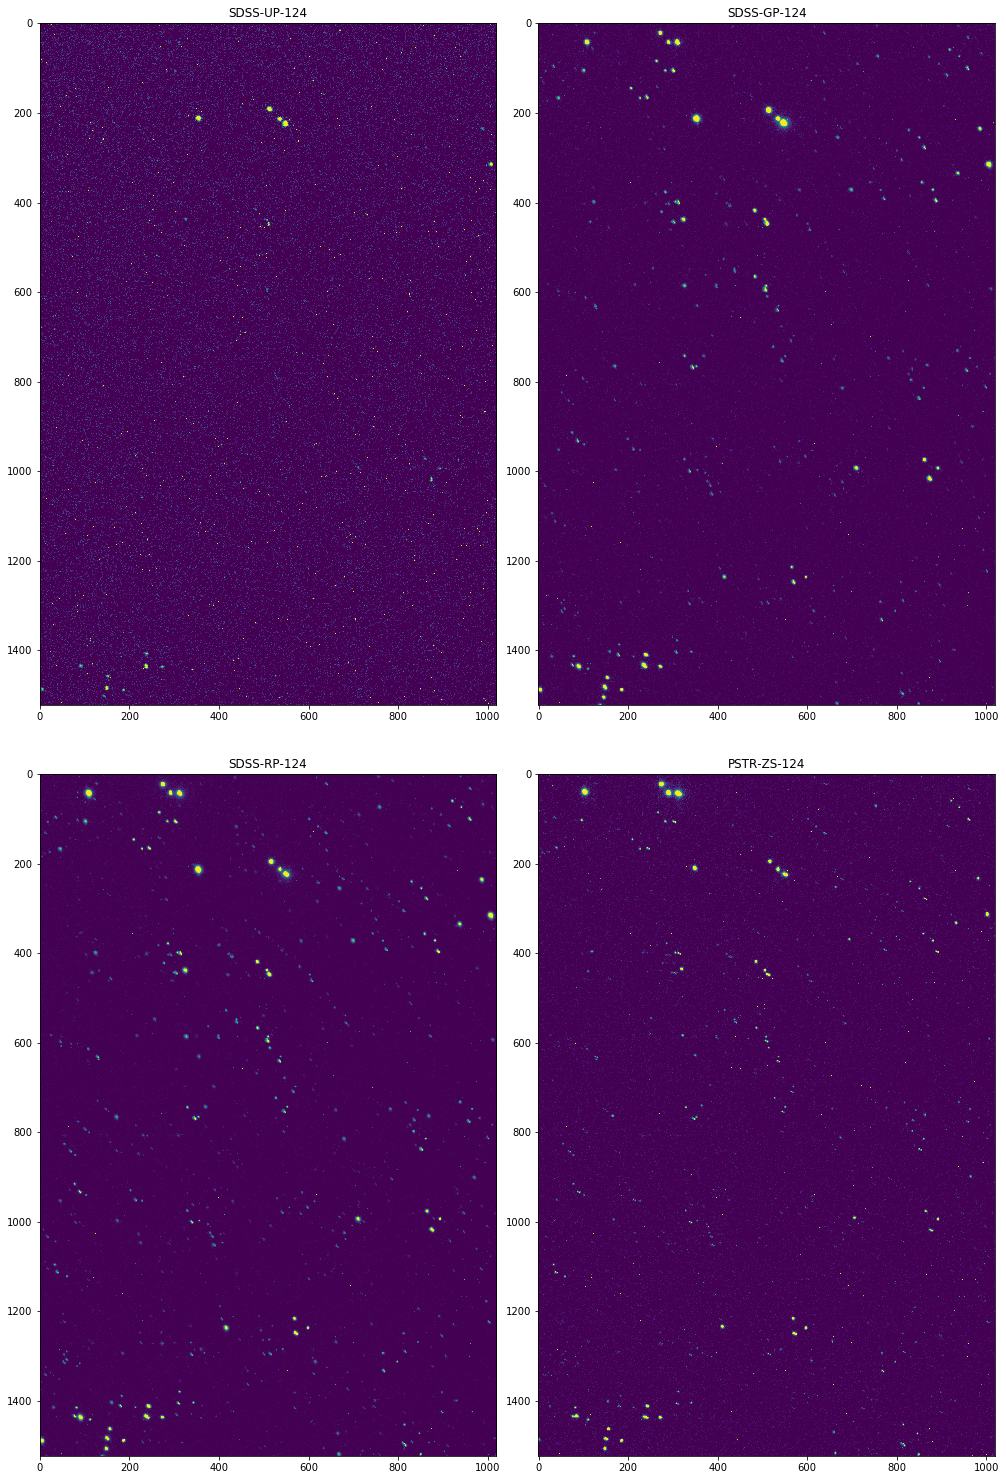

In [133]:
fig,ax=plt.subplots(figsize=(14,21))
fig.clf()
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    frames=phot.dic.img[phot.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    ax=fig.add_subplot(2,2,n+1)
    plot_lco(framestack,ax)
    ax.set_title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_COJ.png')

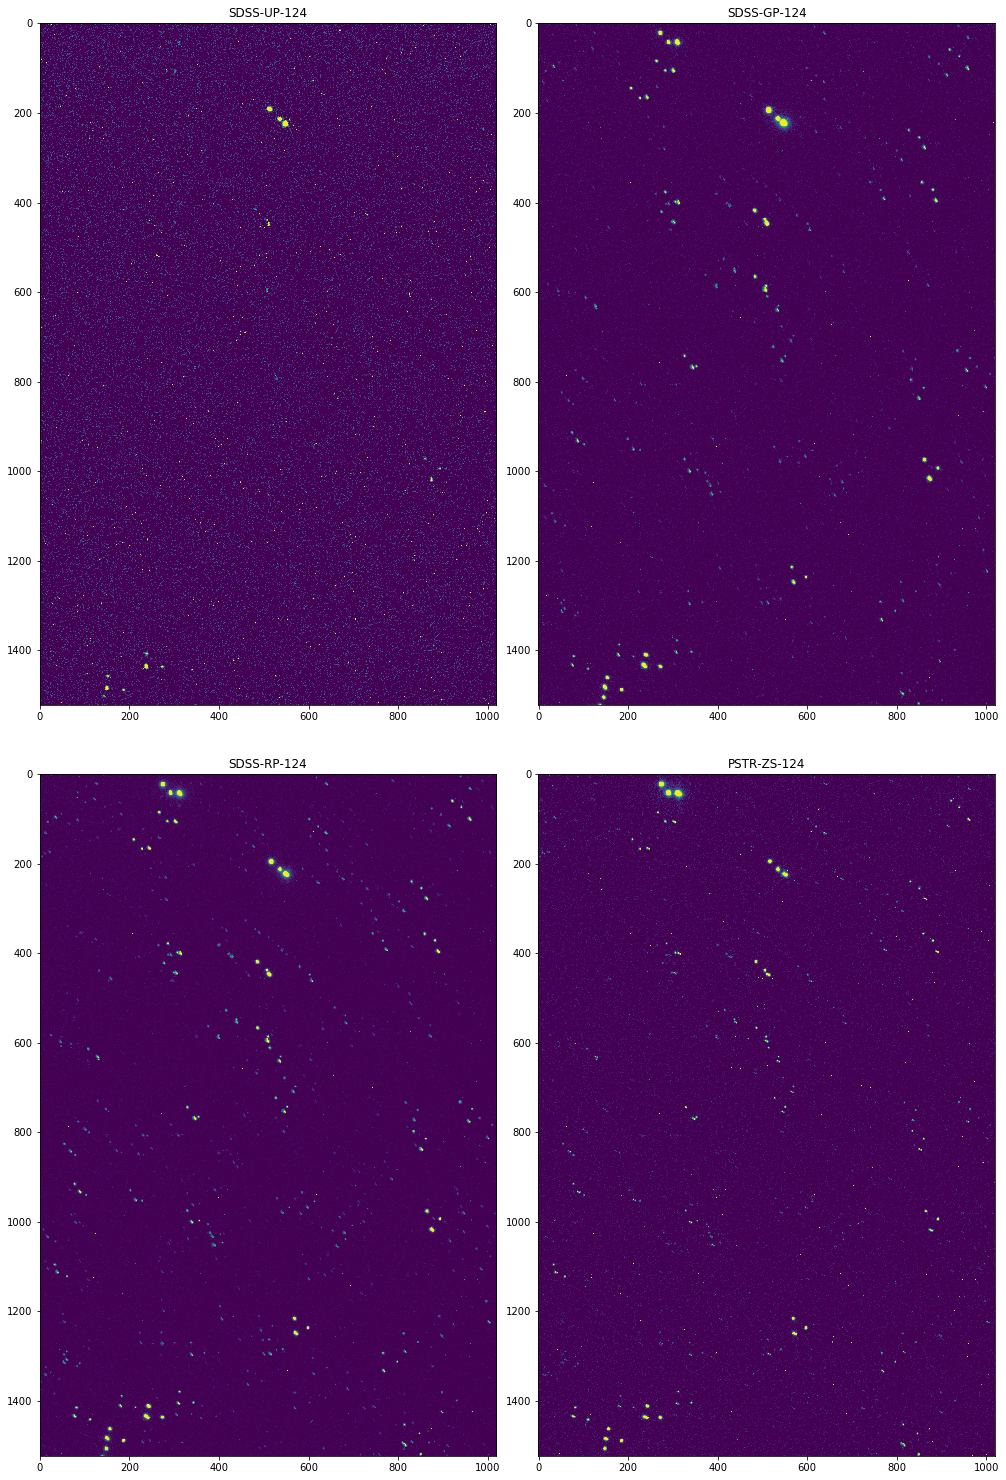

In [118]:
fig=plt.figure(11,figsize=(14,21))
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    frames=phot.dic.img[phot.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    ax=fig.add_subplot(2,2,n+1)
    plot_lco(framestack,ax)
    ax.set_title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_OGG.png')

## Lightcurve reduction

Producing lightcurves:
* determine positions of comparison stars
* determine position of target star
* compute flux for all stars
* divide target star by average of comparison stars

In [224]:
import astropy.coordinates as coor
import astropy.units as u
pds110=coor.SkyCoord('05 23 31.0105','-01 04 23.702',unit=(u.hourangle,u.deg))

In [172]:
from astropy.stats import sigma_clipped_stats
from photutils import datasets
data=phot.dic.iloc[10]['img']   
mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind(data - median)[sources['flux']>10]
print(sources)

 id   xcentroid     ycentroid   ...      peak          flux          mag      
--- ------------- ------------- ... ------------- ------------- --------------
  8 101.814968546 59.3318285441 ... 2126.01147461 17.0770261039 -3.08103060571
  9 775.464415668 62.1266089607 ... 1175.84448242 10.2398926167  -2.5257385058
 20 396.838928542 130.433107766 ... 3036.41967773 25.6088116758 -3.52097356599
 22 1017.62756531 143.484785915 ... 5808.99169922 54.4448928513 -4.33989286861
 25 279.142631461 156.000455806 ... 2243.77099609 18.9076776234 -3.19159547239
 26 837.773616244 168.215084369 ... 1914.60852051 16.2243979677 -3.02542147645
 36 1493.33714648 207.962185896 ... 2054.02734375 16.1913443764 -3.02320727491
 74 1248.45702428 447.488155479 ... 16842.6757812 141.298426041 -5.37534331039
 77 224.576079563 469.067818261 ...  61900.078125 535.592420904 -6.82208605685
 79 753.999237198 474.332171633 ... 1850.86706543 16.0408785583 -3.01307037723
...           ...           ... ...           ...   

In [261]:
pd.unique(phot.dic.filt)

array(['SDSS-UP-124', 'SDSS-GP-124', 'SDSS-RP-124', 'PSTR-ZS-124'], dtype=object)

In [276]:
sources['id'][0]

8

In [416]:
def avg(df):
    #Returning column averages of a dataframe depending on DF shape
    types=np.array([type(df.iloc[0][i]) for i in range(df.shape[1])])
    infl=[(types==float)+(types==int)]
    retarr=df.iloc[0].values
    if df.shape[0]==1:
        return retarr
    if df.shape[0]==2:
        retarr[infl]=0.5*(df.iloc[0].values[infl]+df.iloc[1].values[infl])
        return retarr
    elif df.shape[0]>2 and df.shape[0]<6:
        for i in range(len(retarr)):
            if types[i]==float or types[i]==int:
                retarr[i]=np.average(df[df.columns[i]].values)
        return retarr
    else:
        for i in range(len(retarr)):
            if types[i]==float or types[i]==int:
                retarr[i]=np.median(df[df.columns[i]].values)
        return retarr
    
    
def init_compdic(phot):
    #Setting up comparison disctionaries of nearby stars.
    #Finding stars that are present in multiple frames and bright enough in each filter.
    
    fluxthresh={'SDSS-UP-124':3, 'SDSS-GP-124':10, 'SDSS-RP-124':10, 'PSTR-ZS-124':7}
    compdic={}
    for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
        print(ufilt,str(len(phot.dic[phot.dic.filt==ufilt]))+" frames")
        srcss=pd.DataFrame()
        for frame in phot.dic[phot.dic.filt==ufilt].iterrows():
            #Doing the aperture photometry and returning sources.
            nflux,nmag,srcs=ApPhot(frame[1])
            srcs['filt']=np.tile(ufilt,len(srcs))
            srcs['frame']=np.tile(frame[0],len(srcs))
            srcs.set_index(np.array([frame[0]+'_'+ufilt+'_'+str(s) for s in srcs['id']]),inplace=True)
            srcss=srcss.append(srcs)
        # Now  stars in less than half the frames (and/or very faint) in the srcss dic.
        srcss_coor=coor.SkyCoord(srcss['RA'],srcss['DEC'],unit=u.deg)
        comp_srcs=pd.DataFrame()
        for s in range(len(srcss_coor)):
            #Checking if source is already in the cat above
            if (comp_srcs.shape[0]==0) or (np.min(srcss_coor[s].separation(coor.SkyCoord(comp_srcs['avra'],comp_srcs['avdec'],unit=u.deg)).arcsec)>3):
                #print(srcss_coor.separation(srcss_coor[s])/(3*u.arcsec))
                #print(srcss_coor.separation(srcss_coor[s])<(3*u.arcsec))
                #Compiling nearby sources into single averaged star
                nearbys=srcss.loc[(srcss_coor.separation(srcss_coor[s]).arcsec<3)]
                avdec,avra=np.average(nearbys['DEC']),np.average(nearbys['RA'])
                print(str(len(nearbys))+" source around "+str(avra)+", "+str(avdec))
                if len(nearbys)>1:
                    ser=pd.Series(index=nearbys.columns,data=avg(nearbys),name=str(np.round(avra,5))+'_'+str(np.round(avdec,5))+"_"+ufilt)
                    ser['nframes']=len(nearbys)
                else:
                    ser=pd.Series(index=nearbys.columns,data=avg(nearbys),name=str(np.round(avra,5))+'_'+str(np.round(avdec,5))+"_"+ufilt)
                    ser['nframes']=1
                ser['avra']=avra
                ser['avdec']=avdec
                comp_srcs=comp_srcs.append(ser)
        
        #Removing faint sources and those with only a single frame detection
        comp_srcs=comp_srcs[(comp_srcs['flux']>fluxthresh[ufilt])*(comp_srcs['nframes']>1)]
        compdic[ufilt]=comp_srcs
    #Returning dictionary of stars according to filters.
    return compdic

In [378]:
compdic=init_compdic(phot)

SDSS-UP-124 15 frames
32 sources detected, but only 17 brighter than 3


/Users/hosborn/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


21 sources detected, but only 13 brighter than 3
28 sources detected, but only 10 brighter than 3
15 sources detected, but only 4 brighter than 3
21 sources detected, but only 11 brighter than 3
20 sources detected, but only 12 brighter than 3
35 sources detected, but only 15 brighter than 3
26 sources detected, but only 13 brighter than 3
31 sources detected, but only 17 brighter than 3
125 sources detected, but only 10 brighter than 3
125 sources detected, but only 11 brighter than 3
115 sources detected, but only 15 brighter than 3
144 sources detected, but only 9 brighter than 3
148 sources detected, but only 15 brighter than 3
171 sources detected, but only 19 brighter than 3
1 source around 80.718358173, -1.16143436777
1 source around 80.7262735883, -0.940362579601
2 source around 80.737542232, -0.950087157568
[4 64.545325034707915 68.960171465721118 0.82978802716498001
 0.066523907982472166 -0.619180240371485 25.0 0.0 841.85198974609375
 7.3757903120965702 17.681879996071615 -0.

1 source around 80.9411823427, -1.25536338451
1 source around 80.9713909554, -1.15106404849
1 source around 80.976945587, -1.28269026281
1 source around 80.7388277723, -1.02468895334
1 source around 80.8177131807, -1.06561964283
1 source around 80.8426583876, -0.988403434487
3 source around 80.8708925176, -0.99829620175
[58 215.34987268680658 483.78103610395664 0.4832172502008974
 -0.11363747597085427 -0.032665435256965046 25.0 0.0 5716.98583984375
 51.493046417701734 17.265475634499694 -0.99825440342130456
 80.871110000522393 'SDSS-UP-124' 'PDS110_JD7983.2885_SDSS-UP-124']
1 source around 80.8758461408, -1.21776976627
1 source around 80.8972537181, -1.2639048262
1 source around 80.910892133, -1.13207387977
1 source around 80.9275741068, -0.993116402819
3 source around 80.9564904309, -0.946161458843
[93 53.722702370677432 749.01227006231443 0.96621576037617207
 0.053847220015949666 -0.70961579745862136 25.0 0.0 347.84048461914062
 3.3365250205815511 20.236611135073066 -0.94617453743055

6 source around 80.7743059183, -1.17616243397
[23 772.00615058238282 184.99681615824252 0.75302130598499539
 0.017965769740887254 -0.46785485266343152 25.0 0.0 514.1536865234375
 3.691003777427079 18.380009775852027 -1.1760883707432124
 80.774329807428757 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
6 source around 80.7808098362, -1.34253642711
[29 1288.2734548610522 205.13613946710691 0.72832260914912161
 -0.46660986244632363 -0.61859599343135407 25.0 0.0 940.3013916015625
 7.4516855893682123 17.617234694182869 -1.3424411687885613
 80.780819144939386 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
6 source around 80.7818012163, -1.0259113109
[30 305.65995642076911 208.26862491257714 0.88281539134281761
 0.026212720617532138 -0.41392251287651627 25.0 0.0 711.29547119140625
 4.8046289324366924 18.093721369529696 -1.0258212637355812
 80.781828501360707 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
6 source around 80.7822625625, -1.40821764409
[31 1492.0380151549555 209.6547995140694

[99 43.700546768610891 708.21962665064314 0.85773684266597239
 0.16673373727060609 -0.31056620880790431 25.0 0.0 100320.125
 719.10014795016525 12.655897554733544 -0.94141212062544144
 80.94292382414298 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
1 source around 80.9433473361, -0.939993622459
6 source around 80.9437926567, -1.37957596419
[101 1403.1819140838563 710.95076075016971 0.72953971772625648
 -0.52745260457057386 -0.52751119467655327 25.0 0.0 2459.276611328125
 19.593980378232658 16.567564327993214 -1.379467227871465
 80.943803856241715 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
6 source around 80.945610986, -1.07046098948
[102 443.90487662326143 716.71383364196674 0.59002844632474938
 0.32758140296792249 -0.21928289128216766 25.0 0.0 1581.1697998046875
 13.145813787359074 17.000902309664305 -1.0703668491341622
 80.945660846395739 'SDSS-GP-124' 'PDS110_JD7982.1302_SDSS-GP-124']
6 source around 80.946011015, -0.961646794798
[104 106.2700371353603 717.85854748743452 0.66

3 source around 80.7761459615, -1.40421277494
[18 1450.9032553943589 208.16900533487072 0.55005342351317543
 -0.28230028213891795 0.060887926894066281 25.0 0.0 460.4573974609375
 4.4652903033123259 18.69966545233714 -1.4042046600715157
 80.776157235052338 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
3 source around 80.7767278145, -1.33877494007
[19 1247.7960995624701 209.94506709183216 0.49191449260270348
 -0.55132011969299011 -0.41758677248370174 25.0 0.0 433.65274047851562
 3.9521594109206823 18.832203566001155 -1.3387590209701292
 80.776729521618464 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
3 source around 80.7916457539, -1.35283297233
[22 1291.5445342644862 256.24009664995475 0.52885132378928912
 0.097983586093309441 -0.28394795215259194 25.0 0.0 930.18658447265625
 8.2505213583438284 18.033086217747091 -1.3528557388185567
 80.791646808920532 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
3 source around 80.7989787117, -1.05147706552
[24 356.26293324793238 279.01336787033

3 source around 81.0034559405, -1.13442942763
[91 613.67573969040666 913.50640487626845 0.50033827567488554
 -0.43213575874791366 -0.020629120168155025 25.0 0.0 538.5509033203125
 4.1741816880420286 18.772861328714988 -1.1344313494557976
 81.003432619349013 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
3 source around 81.0119744887, -1.39202811287
[94 1413.0312640640598 940.00001108812762 0.58809248104403666
 -0.34476128139279788 -0.026514573241629692 25.0 0.0 1977.566650390625
 18.46935395774894 17.158160438861735 -1.3920014628650859
 81.011969448017268 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
3 source around 81.0132446111, -1.23138606798
[95 914.64297279253037 943.96578465835216 0.46896444301910861
 -0.72758728463867794 -0.30242019625795685 25.0 0.0 1153.68994140625
 9.5574199724080682 17.873438024480048 -1.2314096801220376
 81.013247308389907 'SDSS-GP-124' 'PDS110_JD7982.3144_SDSS-GP-124']
1 source around 81.0143372587, -0.982570124656
2 source around 81.0189889149, -1.3517

3 source around 80.7717611722, -1.01233122957
[32 256.83031496359882 168.37529539438418 0.47471405400490091
 -0.49114019897931954 -0.25158136720174207 25.0 0.0 1116.057861328125
 9.503831636354894 19.092166264927009 -1.0123497681549374
 80.771779817404848 'SDSS-GP-124' 'PDS110_JD7983.29_SDSS-GP-124']
3 source around 80.7721725483, -1.41896332351
[33 1518.8136943775712 169.58134119407492 0.4491463489385622
 -0.091612082399638847 -0.30676218448224629 25.0 0.0 856.95892333984375
 6.8491618115933193 19.447819533631346 -1.4189888570772173
 80.77216843216253 'SDSS-GP-124' 'PDS110_JD7983.29_SDSS-GP-124']
3 source around 80.7743229285, -1.33830835543
[38 1268.2956527516826 176.26742589510314 0.55388521861033368
 -0.20013441394362663 -0.16526980057167348 25.0 0.0 370.25384521484375
 3.1500382830752307 20.291123520266243 -1.3382663769977643
 80.774322837232859 'SDSS-GP-124' 'PDS110_JD7983.29_SDSS-GP-124']
3 source around 80.7891421108, -1.35254989964
[45 1312.5512802129431 222.28230958731146 0.4

1 source around 80.9800360351, -1.08467978607
1 source around 81.010343349, -1.09208196796
1 source around 81.0159945539, -0.95088554888
2 source around 81.0266745122, -1.29110094679
[172 1121.8590156152964 959.17941099544146 0.46416402829336062
 0.030052328105384916 0.048854866362990509 25.0 0.0 341.101318359375
 3.1809356818239638 20.279540480478477 -1.2911106828093735
 81.026681143542987 'SDSS-GP-124' 'PDS110_JD7983.2901_SDSS-GP-124']
1 source around 80.7731389452, -1.40400189777
1 source around 80.7744429623, -1.17171401843
1 source around 80.8264054084, -1.26455874845
1 source around 80.8486575548, -1.23738951762
1 source around 80.9490567766, -1.37159029121
1 source around 80.9493628149, -1.37040247775
1 source around 80.9529724507, -1.22772863676
1 source around 80.9636916202, -1.31432642671
1 source around 80.9645668617, -1.31380863456
1 source around 81.0384812203, -1.34105477941
2 source around 80.6625420883, -1.12335466538
[4 594.60169509030459 8.1406212397570741 0.424251834

3 source around 80.9592266806, -1.39436535438
[158 1435.6068309814118 929.20812234886364 0.46250321671482897
 -0.40467149693651838 0.28484173158860704 25.0 0.0 11444.0712890625
 71.636723604067711 17.362160713437085 -1.3943652566495661
 80.959277894979081 'SDSS-GP-124' 'PDS110_JD7985.2869_SDSS-GP-124']
3 source around 80.9736237406, -0.986088925435
[160 168.53753018501291 973.74847475148147 0.4431643081681706
 -0.070510318750731382 -0.10244435638431482 25.0 0.0 1411.57958984375
 10.210502895389101 19.477382167967384 -0.98608737083739306
 80.973629786308805 'SDSS-GP-124' 'PDS110_JD7985.2869_SDSS-GP-124']
2 source around 80.9784300598, -1.38743093918
[162 1413.9826917497614 988.62123897787103 0.57235220772261486
 -0.56110098948954756 -0.068102019644365575 25.0 0.0 611.01025390625
 4.0658387848054973 20.477124614083515 -1.387397478452701
 80.978422121448418 'SDSS-GP-124' 'PDS110_JD7985.2869_SDSS-GP-124']
1 source around 80.9863021884, -0.971492742789
3 source around 80.9868119885, -1.4111

6 source around 80.7944933262, -1.05372489322
[57 392.32030554634764 247.31848202309345 0.59176947623709875
 0.22141524208035149 -0.73915661512935427 25.0 0.0 2075.15625
 15.443888912829134 16.797927327241638 -1.0537409873427119
 80.794416649763008 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 80.796172006, -1.35626135833
[58 1331.0703334125631 252.58754553071321 0.63569722861964717
 -0.31227513754870956 -0.41363799483292907 25.0 0.0 3231.76611328125
 23.290154847731507 16.351888059975902 -1.3562271074329371
 80.796114459115458 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 80.8018758193, -1.03183136617
[62 324.54593032422508 270.35239945891908 0.83210816173779723
 0.067562392088209147 -0.29154938114848311 25.0 0.0 765.5731201171875
 4.5879880681819669 18.115763300558935 -1.031902577548917
 80.801838689825658 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
5 source around 80.8081202497, -1.01019848043
[68 257.46277098105679 289.62575911032548 0.586812931

6 source around 80.8858960262, -1.04155607537
[132 354.57149231312616 531.06250391909566 0.839076727905536
 0.48000731284945897 -0.3449433074633787 25.0 0.0 824.37921142578125
 5.1802208134794325 17.98394831876832 -1.0415774808564517
 80.885845279040609 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 80.8878774467, -1.14243224578
[134 667.70432587785604 537.12825551146011 0.80434128549596628
 0.42022453403576504 -0.6447072683779661 25.0 0.0 634.5830078125
 3.9166279988387096 18.287538189412025 -1.1424758383384204
 80.887799798998145 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 80.8900729075, -0.979582619467
[136 162.23486514576888 544.11184632218362 0.72192318897808128
 0.23037073796657792 -0.46966885120003138 25.0 0.0 786.90704345703125
 5.1967741767140598 17.980484387054748 -0.97960234543585889
 80.890050067148266 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 80.8940959587, -1.36612416063
[139 1361.7395813149474 556.47209191379716 0.7

[219 631.28662886170878 891.82673976493072 0.56383109707534007
 0.6070996559695645 -0.50069191441197525 25.0 0.0 1702.6943359375
 12.443123578252852 17.032495464201808 -1.1307412470776617
 81.002091532813154 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 81.0029486169, -0.934079604412
[220 20.970547095408484 894.37994703697871 0.66410775146667778
 0.077381564232338121 -0.38507326892889088 25.0 0.0 683.28887939453125
 4.542000467600193 18.126701063513863 -0.93408384295296498
 81.002914232934145 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 81.0044302895, -0.945427040025
[222 56.251569225224507 898.99006828750589 0.63678469788743808
 0.01475477029821296 -0.35380581695719665 25.0 0.0 713.8536376953125
 4.9162773950091188 18.0407280513827 -0.94545217230590572
 81.004399716448205 'SDSS-RP-124' 'PDS110_JD7982.131_SDSS-RP-124']
6 source around 81.0109752662, -1.18281567776
[226 792.94745468078656 919.15540472929399 0.82424458328057115
 -0.11496375566798579 -0.

3 source around 80.7511977724, -1.32619782123
[18 1209.7583759174825 129.35912657130339 0.53662689343294157
 -0.12037041375842407 -0.22544887533088312 25.0 0.0 564.6611328125
 4.1150435802344223 18.754289002614634 -1.3261846433511888
 80.751187940784078 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
1 source around 80.7518299342, -1.0734063673
3 source around 80.7564611822, -0.961587994384
[20 78.291799545317716 145.75249260633419 0.54670671571694396
 -0.80973828909165968 -0.28327677675174456 25.0 0.0 1390.16455078125
 11.012891800231236 17.685471669060043 -0.96160096874238032
 80.756470247617585 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
3 source around 80.7584163236, -1.41710242069
[22 1491.8279827306976 151.74871509178161 0.51829180853403833
 -0.1450053165799853 -0.11040905592526694 25.0 0.0 793.2877197265625
 7.2087377175765974 18.145577038854906 -1.4170737388798915
 80.758402363751784 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
3 source around 80.7599052505, -1.250878422

3 source around 80.8719484048, -0.999721641197
[89 196.60423353250516 504.07455611393635 0.25625363187120009
 -0.78715302857901515 -0.3954754599084776 25.0 0.0 135805.03125
 996.1234596597003 12.794442179327032 -0.99972386413825176
 80.871929579192269 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
6 source around 80.8729150226, -1.13334752805
[90 611.88397607567572 507.18838040130396 0.3749577664574239
 -0.73075761805792183 -0.4808799696076046 25.0 0.0 2140.132080078125
 13.983261516733622 17.426203900103044 -1.1335362256243846
 80.872932922573753 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
3 source around 80.8733781445, -1.34301722189
[91 1261.8951228356998 508.48836758950461 0.4571068657663474
 -0.077628615434280027 -0.038432615531568418 25.0 0.0 1117.990234375
 9.2514658013597941 17.874698730582452 -1.3429842618026144
 80.873351807334387 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
6 source around 80.881872648, -1.11906904088
[95 567.50062061580888 534.72468933791117 0.46320

3 source around 80.9879763584, -1.40731624702
[161 1461.4634646819643 864.2034092690634 0.52688394621940571
 -0.67129715763736508 -0.17491950801665127 25.0 0.0 47368.9375
 405.57635464829156 13.7700435314323 -1.4072896163975219 80.987971098542246
 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
3 source around 80.990602235, -1.42149990852
[162 1505.4477372344704 872.37460942478162 0.50301636852703524
 -0.75607658998641214 -0.12972691059981464 25.0 0.0 61670.15625
 556.51525679533165 13.426532412594529 -1.4214623264422184
 80.990604040814645 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
1 source around 80.9916454237, -0.960415978121
2 source around 80.9956760702, -1.07816122166
[166 440.1707481607927 888.12259560427822 0.45535777137974698
 -0.5546244234646831 -0.31923205609848748 25.0 0.0 482.4691162109375
 4.0547673596681744 18.770310245438921 -1.0782064077407001
 80.995678391916925 'SDSS-RP-124' 'PDS110_JD7982.3151_SDSS-RP-124']
2 source around 81.0034166784, -1.13441634479
[168 614

3 source around 80.7768526878, -1.09259025919
[59 515.44714369251642 190.13957109954907 0.72890468463577351
 -0.52762049512136822 -0.25114334543128697 25.0 0.0 602.13299560546875
 4.1731477512326318 18.776391496806227 -1.0926038018564777
 80.776840667354293 'SDSS-RP-124' 'PDS110_JD7983.131_SDSS-RP-124']
2 source around 80.7816677464, -1.38628046986
[64 1426.8645961143411 205.15452779781774 0.69016403171945662
 0.026435706135100635 -0.048156207782099295 25.0 0.0 447.83905029296875
 3.5395222026838273 18.955189297719922 -1.3862827587479545
 80.78167882006818 'SDSS-RP-124' 'PDS110_JD7983.131_SDSS-RP-124']
1 source around 80.7941553047, -1.10519194055
3 source around 80.7989351396, -1.4012388271
[76 1473.1937334826086 258.69518580281567 0.55134116558285362
 0.10020239057254897 0.025670201295285227 25.0 0.0 383.39889526367188
 3.2191844081385637 19.058186261063938 -1.4012110363443961
 80.798930809869788 'SDSS-RP-124' 'PDS110_JD7983.131_SDSS-RP-124']
3 source around 80.8030936185, -1.3822706

3 source around 80.7362954809, -1.23706676717
[14 953.33790312116901 58.075639811823443 0.54573819282149072
 0.077654177657793977 -0.12969188489211919 25.0 0.0 626.98529052734375
 6.0945874847709174 19.57061851122991 -1.2370522132279322
 80.736300900606025 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.7429490468, -0.954065822866
[21 75.16589516625298 78.714609290505862 0.59619653427314034
 -0.1463516970635973 -0.099727929368141177 25.0 0.0 4737.8203125
 42.422130309965262 17.46399811581972 -0.95408567733134819
 80.742951235215827 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.7436188727, -0.932278541522
[22 7.4762387410764202 80.820179696247124 0.56436747874005944
 0.10571688733598285 -0.27865030386936079 25.0 0.0 985.9990234375
 9.2155720987578071 19.12167354698277 -0.93227456581656909
 80.743629696791004 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.7455180682, -1.25736922652
[24 1016.3339809678383 86.668147206013529 0.577

3 source around 80.8214777479, -1.25474145263
[107 1008.2143532876381 322.41807616163004 0.53534975255475048
 0.077460529014726026 0.0067166731772530042 25.0 0.0 893.3543701171875
 8.5214439944975897 19.206696314930305 -1.254734624948239
 80.821477907874296 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
4 source around 80.8263222926, -1.10397092744
[56 522.27561716368712 361.77572691448114 0.51174083929803349
 -0.58972864244387468 -0.28865795800803334 25.0 0.0 583.602294921875
 3.8756784717119581 18.812123548553522 -1.1045960321971882
 80.826277317561335 'SDSS-RP-124' 'PDS110_JD7982.3154_SDSS-RP-124']
3 source around 80.8264335685, -1.26453397368
[113 1038.6075115299104 337.82718138160629 0.57797732031696636
 -0.11879523192032258 -0.049379543047969279 25.0 0.0 1026.161865234375
 9.590616435431798 19.078362994298931 -1.2645279759374155
 80.826443064000742 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.8324583436, -1.00054383869
[119 219.44047127981145 356.5885457005

3 source around 80.9437819248, -1.18936224932
[231 805.32826652864662 701.96470216607406 0.53291057318824631
 -0.29487016998647125 0.019676276426004127 25.0 0.0 454.6971435546875
 4.1599220382137378 19.985266321204083 -1.1893602192147861
 80.943776265142404 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.9471877869, -1.05866342561
[232 399.71479017795059 712.59630200458685 0.59217770953844728
 -0.42470244557038384 0.16467328620934155 25.0 0.0 5421.8486328125
 46.428667082931582 17.366013760705179 -1.058662543501784
 80.947202002868138 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.9491565767, -1.33896452526
[234 1269.6362895443065 718.73418990148525 0.43920179029044992
 0.64468778973309038 -0.18946565676277513 25.0 0.0 427.57867431640625
 3.872529081944208 20.062992580222428 -1.3389705821864988
 80.949179766746028 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 80.9497898907, -1.07294900589
[236 444.03431858731722 720.6429221715255

3 source around 81.0323251765, -1.36507808848
[317 1350.6003508405779 976.79979320950008 0.48886058454002679
 0.31936928553553262 -0.090499165619021965 25.0 0.0 372.50244140625
 3.4765495334475012 20.180108246150635 -1.3650590019375195
 81.032334238923056 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 81.0349878635, -1.26602745562
[319 1043.2559135806659 984.97502375381157 0.56450519917629238
 0.07263019393824853 -0.013125784500463061 25.0 0.0 553.88134765625
 4.9234046897976995 19.802315462486369 -1.2660257943759923
 81.034968479876227 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 81.0383466643, -1.36032676578
[323 1335.9326686749769 995.53997638797705 0.53438265780956729
 0.38993430262185053 0.23861364044898006 25.0 0.0 346.40362548828125
 3.0805290415252 20.311416031407326 -1.3603327487952703 81.038372742391672
 'SDSS-RP-124' 'PDS110_JD7983.2906_SDSS-RP-124']
3 source around 81.040536983, -0.964831011773
[325 108.4433687859129 1002.2847257502253 0.

[64 91.875598452639807 306.96172950115641 0.4273409346724017
 -0.39757080360782193 0.094248999905146569 25.0 0.0 618.19281005859375
 3.573697797170821 20.617205438872393 -0.96161713727918396
 80.758686279505923 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
3 source around 80.7592999453, -1.25194791437
[65 992.95408973927897 308.87345206792588 0.44683955089487654
 -0.45234606076758527 0.025318755054742292 25.0 0.0 9787.1474609375
 56.365993692292932 17.62245708073214 -1.2519646511382121
 80.759302278999655 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
3 source around 80.763006624, -1.05199086099
[67 372.42384899383933 320.45626542193554 0.44196984567232267
 -0.48838638281221886 0.020934927912006795 25.0 0.0 2879.52587890625
 16.501676475907846 18.956179829275843 -1.052016018009126
 80.763034518858177 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
2 source around 80.7695112348, -1.194502776
[71 814.58904822539102 340.69086954387683 0.44049705539342698
 -0.30979202285549617 -0.068988

3 source around 80.9592229595, -1.39439936437
[178 1434.9149011406657 929.36225283362603 0.41812624324914077
 -0.40940723654866307 0.38835703559925755 25.0 0.0 17928.154296875
 85.288424587229727 17.172774769063022 -1.3943742459231034
 80.95923755924639 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
1 source around 80.9726515208, -1.12788755279
3 source around 80.9736415254, -0.986070779605
[191 167.85087393776743 974.05464827342041 0.4465287732898014
 -0.49431463838587597 -0.033823469224518135 25.0 0.0 2577.794189453125
 15.129111681713823 19.050466427968416 -0.98609805937994732
 80.973638442221429 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
2 source around 80.9735524992, -1.2391210272
[192 953.0416717917177 973.90239863209547 0.50679105683607406
 -0.47377676322819623 -0.064761652112579657 25.0 0.0 663.9305419921875
 3.5823398641703488 20.614583035237608 -1.2391039831328869
 80.973589384003674 'SDSS-RP-124' 'PDS110_JD7985.2879_SDSS-RP-124']
2 source around 80.978448372, -1.387400

4 source around 80.8256308509, -1.0025957991
[59 234.64268587802655 342.89024202217723 0.57969375323934813
 0.12387565444150997 -0.13205044609018241 25.0 0.0 389.33502197265625
 3.7179412400317133 18.295563795724206 -1.0025970876718087
 80.825634911318247 'PSTR-ZS-124' 'PDS110_JD7982.1319_PSTR-ZS-124']
3 source around 80.8375547738, -0.934377630759
[63 22.887701604980446 379.97298593344874 0.5848095984894196
 0.0067793397417398437 0.043021860711942014 25.0 0.0 312.25054931640625
 3.0776573632413866 18.500769429955735 -0.93436492607271593
 80.837583795467438 'PSTR-ZS-124' 'PDS110_JD7982.1319_PSTR-ZS-124']
6 source around 80.8378711155, -0.969630846769
[64 132.37800332882836 380.87163464308065 0.57252946675986416
 -0.13331498763347305 0.027984778841692478 25.0 0.0 797.32037353515625
 7.5054183482128538 17.532882838479587 -0.96964513440595579
 80.837873360051645 'PSTR-ZS-124' 'PDS110_JD7982.1319_PSTR-ZS-124']
1 source around 80.8383673747, -1.14410931747
6 source around 80.8481559096, -1.

6 source around 80.994886839, -1.4047605201
[142 1482.6969549200142 868.10875534945262 0.72965166890307032
 0.13317317548759799 -0.023561210952928659 25.0 0.0 14663.91796875
 123.58616712384597 14.491395441685546 -1.4047479076964491
 80.994871987834813 'PSTR-ZS-124' 'PDS110_JD7982.1319_PSTR-ZS-124']
6 source around 81.0022398963, -1.13051867316
[146 631.57841471029838 890.90629206834774 0.57903378304103892
 0.1704985288856293 -0.022058259783226231 25.0 0.0 548.18011474609375
 4.9721581878547703 17.979957757125668 -1.1304986002955406
 81.002217860777563 'PSTR-ZS-124' 'PDS110_JD7982.1319_PSTR-ZS-124']
1 source around 81.0028535929, -1.21330730277
1 source around 81.0058678823, -1.21803645487
1 source around 81.0110417622, -1.18257680782
6 source around 81.0149709123, -1.22749479968
[153 932.54525952538131 930.45552131391662 0.60684195885480097
 -0.43195711788030766 0.0057288351548522645 25.0 0.0 1004.543701171875
 8.9525567211888113 17.341452396811853 -1.2274768058470673
 81.014961501312

6 source around 80.8728948585, -1.13336822963
[56 611.70339324404756 505.02664878151165 0.58456822892888782
 -0.4482171295531201 -0.24921137325828471 25.0 0.0 991.0750732421875
 9.8837560012368932 17.765163861246627 -1.1335166489341932
 80.872844281274055 'PSTR-ZS-124' 'PDS110_JD7982.316_PSTR-ZS-124']
3 source around 80.8733423713, -1.34310215197
[57 1262.1586820894865 506.51425135281124 0.66359860594378717
 -0.47066680993640359 -0.0014886360022376213 25.0 0.0 450.42034912109375
 4.0758402439934498 18.726926017179121 -1.3431077975621679
 80.873323619880367 'PSTR-ZS-124' 'PDS110_JD7982.316_PSTR-ZS-124']
6 source around 80.8823461958, -1.07143338496
[59 419.76956646760385 533.48742223773934 0.53417251655848874
 -0.53968051335093148 -0.044263213099093167 25.0 0.0 7229.3310546875
 73.613774711903204 15.585071180677039 -1.0716713047506723
 80.882014974943274 'PSTR-ZS-124' 'PDS110_JD7982.316_PSTR-ZS-124']
6 source around 80.8818493792, -1.11907824818
[60 567.27494332648223 532.58123274457716

1 source around 80.9810254518, -1.2669170248
1 source around 81.0129270449, -1.12383039797
1 source around 80.7329991185, -1.13394077872
1 source around 80.7443538021, -1.27609564683
1 source around 80.8246738769, -1.25710504988
1 source around 80.8430028125, -0.952254425417
1 source around 80.7878957787, -1.29143045567
1 source around 80.951033995, -1.33408663714
3 source around 80.7352180641, -1.17098668847
[7 748.99673086436565 54.748664070996725 0.56966190184102028
 -0.11551331120548544 -0.090964114119520004 25.0 0.0 600.96539306640625
 5.3845197901168769 19.701199156264039 -1.1709870021674067
 80.735219291756209 'PSTR-ZS-124' 'PDS110_JD7983.2914_PSTR-ZS-124']
3 source around 80.7429067015, -0.954065915916
[10 75.766294434941301 78.595841177101221 0.54307684711090409
 0.15480547281687326 -0.048979780918360846 25.0 0.0 967.49432373046875
 8.8281202761223696 19.164395996382318 -0.95405719487348106
 80.742903382157053 'PSTR-ZS-124' 'PDS110_JD7983.2914_PSTR-ZS-124']
3 source around 80.

2 source around 80.7743051605, -1.33832511425
[38 1268.1809901463846 176.08153934081798 0.58310202333057659
 0.11462725734265027 -0.10895138354671569 25.0 0.0 415.595947265625
 3.8956696561215982 20.050662293527552 -1.3383130412693907
 80.774307107120933 'PSTR-ZS-124' 'PDS110_JD7983.2917_PSTR-ZS-124']
1 source around 80.9016679061, -1.35574824015
1 source around 80.9860078266, -1.23318416096
1 source around 81.034161808, -1.25117572512
1 source around 81.0452330221, -1.04482194548
1 source around 80.9167753628, -0.954327098004
3 source around 80.6639850593, -1.03396549459
[8 313.95426920504076 16.795025673973726 0.49122689322949387
 -0.30971229410174322 -0.11200164217991097 25.0 0.0 8524.31640625
 67.683034273859917 17.423800449580703 -1.033981931188291
 80.663973119383826 'PSTR-ZS-124' 'PDS110_JD7985.2888_PSTR-ZS-124']
3 source around 80.6705245421, -1.00823640458
[13 234.11335178686645 37.05370701093134 0.49603432997312474
 -0.3155873494666418 -0.13623449166384083 25.0 0.0 2370.17480

1 source around 80.6877434904, -1.29791224291
1 source around 80.778768233, -1.36079266954
1 source around 80.7804481676, -1.3450282215
1 source around 80.8030514108, -1.1840128598
1 source around 80.8203043228, -0.97790343956
1 source around 80.8722752637, -1.06089008723
1 source around 80.9019108914, -1.094726534
1 source around 80.9058266752, -1.10863595115
1 source around 80.8417634087, -1.10658193274
1 source around 80.9325641128, -1.2533754119
1 source around 80.976198336, -1.27667472679


In [459]:
compdic=np.load('ComparisonStars.npy').item()

In [468]:
def ApPhot(idic,compdic={},fluxthresh=3):
    #Finding all sources woth photutils:
    from astropy.stats import sigma_clipped_stats
    from photutils import datasets
    data=idic['img']   
    mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
    from photutils import DAOStarFinder
    daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
    sources = daofind(data - median).to_pandas()
    
    #Computing rough RA/DEC of sources:
    sources['DEC']=(idic['targ_pix'][0]-sources['xcentroid'])*idic['pixscale']/3600.0+\
                    coor.SkyCoord(idic['ra'],idic['dec'],unit=(u.hourangle,u.deg)).dec.deg
    sources['RA']=(sources['ycentroid']-idic['targ_pix'][1])*idic['pixscale']/3600.0+\
                   coor.SkyCoord(idic['ra'],idic['dec'],unit=(u.hourangle,u.deg)).ra.deg
    sources['mag']+=idic['skymag']
    #Finding PDS110 in the sources
    allsrc=coor.SkyCoord(sources['RA'],sources['DEC'],unit=u.deg)
    npds=np.argmin(allsrc.separation(pds110))
    
    #Clipping comparison list by mag / good photometry stars:
    if len(compdic)==0:
        srcbool=sources['flux']>fluxthresh
        #Taking only bright sources. 
    else:
        #sources = daofind(data - median)
        radeclist=compdic[idic['filt']]
        #Taking specific RA/DEC of the sources
        idx, d2d, _ = allsrc.match_to_catalog_sky(coor.SkyCoord(radeclist['RA'],radeclist['DEC'],unit=u.deg))
        #return idx,d2d,allsrc,coor.SkyCoord(radeclist['RA'],radeclist['DEC'],unit=u.deg)
        #compdic[idic.filt].iloc[idx[d2d.arcsec<5]] #Taking sources with match to cat of <5arcsec
        #sources[d2d.arcsec<5]
        mergedic=pd.merge(compdic[idic.filt].iloc[idx[d2d.arcsec<5]], sources[d2d.arcsec<5],how=inner)
    
    print(idic.namae,str(len(allsrc))+" sources detected, but only "+str(np.sum(srcbool))+" brighter than "+str(fluxthresh))
    #Doing photometry
    normflux=sources.iloc[npds]['flux']/np.median(sources.loc[(srcbool)*(range(len(sources))!=npds)]['flux'])
    if len(compdic)==0:
        normmag=sources.iloc[npds]['mag']
    else:
        # Using the average magnitudes of each comparison star in the compdic and generating a 
        # weighted average on the PDS110 magnitude
        diffmags=mergedic.iloc[notpds]['mag'].values-mergedic.iloc[~notpds]['mag'].values
    sources=sources.loc[srcbool]
    #print(sources.loc[srcbool].shape)
    return normflux,normmag,sources


def ApPhot_Comp(idic,compdic):
    #Finding all sources woth photutils:
    from astropy.stats import sigma_clipped_stats
    from photutils import datasets
    data=idic['img']   
    mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
    from photutils import DAOStarFinder
    daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
    sources = daofind(data - median).to_pandas()
    
    #Computing rough RA/DEC of sources:
    sources['DEC']=(idic['targ_pix'][0]-sources['xcentroid'])*idic['pixscale']/3600.0+\
                    coor.SkyCoord(idic['ra'],idic['dec'],unit=(u.hourangle,u.deg)).dec.deg
    sources['RA']=(sources['ycentroid']-idic['targ_pix'][1])*idic['pixscale']/3600.0+\
                   coor.SkyCoord(idic['ra'],idic['dec'],unit=(u.hourangle,u.deg)).ra.deg
    sources['mag']+=idic['skymag']
    #Finding PDS110 in the sources
    allsrc=coor.SkyCoord(sources['RA'],sources['DEC'],unit=u.deg)
    
    
    #Clipping comparison list by mag / good photometry stars:
    filtcompdic=compdic[idic.filt].copy(deep=True)
    #Taking specific RA/DEC of the sources
    idx, d2d, _ = allsrc.match_to_catalog_sky(coor.SkyCoord(filtcompdic['RA'],filtcompdic['DEC'],unit=u.deg))
    filtcompdic.columns=[c+'_av' for c in filtcompdic.columns]
    mergedic=pd.concat([filtcompdic.iloc[idx[d2d.arcsec<5]], sources[d2d.arcsec<5]],axis=1, join_axes=[compdic[idic.filt].iloc[idx[d2d.arcsec<5]].index])
    #print(compdic[idic.filt].iloc[idx[d2d.arcsec<5]].shape)
    #print(sources[d2d.arcsec<5].shape)
    #A merged list of observed per frame info and average info for the comp stars.
    pds=np.argmin(coor.SkyCoord(mergedic['RA_av'],mergedic['DEC_av'],unit=u.deg).separation(pds110).arcsec)
    
    mag,magerr = DiffMag(mergedic['mag'].values,mergedic['mag_av'].values,mergedic['flux_av'].values,pds)
    
    return mag,magerr

def DiffMag(mags,avmags,avflux,targn):
    #Calculate magnitude of a target, given the magnitudes of other stars and their average mags.
    nottargn=range(len(mags))!=targn
    vals = avmags[nottargn]-(mags[nottargn]-mags[targn])
    av = np.average(vals,weights=avflux[nottargn]**2)
    var = np.average((vals-av)**2, weights=avflux[nottargn]**2)
    return av, var**0.5

In [467]:
phot.dic['mag'] = np.zeros(len(phot.dic))
phot.dic['magerr'] = np.zeros(len(phot.dic))
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    for row in phot.dic[phot.dic.filt==ufilt].iterrows():
        mag,magerr = ApPhot_Comp(row[1],compdic)
        phot.dic.loc[row[0],'mag']=mag
        phot.dic.loc[row[0],'magerr']=magerr

Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True  True  True False  True  True]
Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True False  True  True]
Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', '

Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True]
Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True  True  True  True  True  True  True False  Tru

Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'r

Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Index(['DEC_av', 'RA_av', 'avdec_av', 'avra_av', 'filt_av', 'flux_av',
       'frame_av', 'id_av', 'mag_av', 'nframes_av', 'npix_av', 'peak_av',
       'roundness1_av', 'roundness2_av', 'sharpness_av', 'sky_av',
       'xcentroid_av', 'ycentroid_av', 'id', 'xcentroid', 'ycentroid',
       'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux',
       'mag', 'DEC', 'RA'],
  

In [412]:
len(idx)


22

In [448]:
sources.to_pandas().copy(deep=True)

id    xcentroid   ycentroid  sharpness  roundness1  roundness2  npix  \
0     8   101.814969   59.331829   0.766978    0.054568    0.123289  25.0   
1     9   775.464416   62.126609   0.700882   -0.393679   -0.237723  25.0   
2    20   396.838929  130.433108   0.722695   -0.137267    0.095855  25.0   
3    22  1017.627565  143.484786   0.553662    0.807868    0.283335  25.0   
4    25   279.142631  156.000456   0.746786    0.028021   -0.040574  25.0   
5    26   837.773616  168.215084   0.751523   -0.017231   -0.039280  25.0   
6    36  1493.337146  207.962186   0.805758   -0.091941   -0.122367  25.0   
7    74  1248.457024  447.488155   0.716442    0.622871    0.026006  25.0   
8    77   224.576080  469.067818   0.684513   -0.044927   -0.068926  25.0   
9    79   753.999237  474.332172   0.701040    0.066837   -0.011261  25.0   
10   82   641.360913  484.576468   0.671126    0.376201    0.011273  25.0   
11   84   447.882275  507.174946   0.699590   -0.054835   -0.008580  25.0   
12   85   595.984242  510.732883   0.578709    0.274306    0.135140  25.0   
13  110   768.789354  673.433426   0.696525   -0.043677    0.043493  25.0   
14  114   400.878283  705.573470   0.566398    0.476725    0.226623  25.0   
15  115    44.651899  706.642975   0.465721    0.585245    0.151583  25.0   
16  116  1404.433371  709.418955   0.777280    0.443711   -0.033369  25.0   
17  120   107.298724  716.416484   0.721088    0.300372   -0.059902  25.0   
18  131   166.532222  775.292026   0.697899    0.193645   -0.202471  25.0   
19  132  1435.039571  779.003818   0.859902    0.265764    0.547610  25.0   
20  133  1434.253929  780.995499   0.819523   -0.074023    0.198289  25.0   
21  143  1482.847549  868.015116   0.738231    0.249043    0.042928  25.0   
22  150   932.683669  930.318766   0.683089   -0.112418    0.007960  25.0   
23  153  1433.058551  941.094844   0.787108    0.213264    0.037045  25.0   
24  159  1111.804728  980.173917   0.705714    0.120309    0.014439  25.0   

    sky           peak         flux       mag       DEC         RA  
0   0.0    2126.011475    17.077026 -3.081031 -0.959755  80.734302  
1   0.0    1175.844482    10.239893 -2.525739 -1.176820  80.735203  
2   0.0    3036.419678    25.608812 -3.520974 -1.054819  80.757213  
3   0.0    5808.991699    54.444893 -4.339893 -1.254851  80.761418  
4   0.0    2243.770996    18.907678 -3.191595 -1.016894  80.765451  
5   0.0    1914.608521    16.224398 -3.025421 -1.196898  80.769387  
6   0.0    2054.027344    16.191344 -3.023207 -1.408135  80.782194  
7   0.0   16842.675781   141.298426 -5.375343 -1.329229  80.859375  
8   0.0   61900.078125   535.592421 -6.822086 -0.999312  80.866328  
9   0.0    1850.867065    16.040879 -3.013070 -1.169904  80.868025  
10  0.0    1402.869629    11.824175 -2.681927 -1.133609  80.871326  
11  0.0   12445.475586   106.853775 -5.071975 -1.071266  80.878607  
12  0.0    2209.608887    20.670351 -3.288370 -1.118988  80.879754  
13  0.0    2418.220703    20.672900 -3.288503 -1.174669  80.932180  
14  0.0    1843.142578    16.847193 -3.066319 -1.056120  80.942536  
15  0.0  136105.484375  1258.381056 -7.749530 -0.941336  80.942880  
16  0.0    1437.753052    11.531452 -2.654710 -1.379488  80.943775  
17  0.0    3445.680420    28.529714 -3.638244 -0.961522  80.946030  
18  0.0    1913.832397    15.955404 -3.007270 -0.980609  80.965001  
19  0.0    7550.175293    53.766835 -4.326286 -1.389350  80.966197  
20  0.0   13785.170898   104.228875 -5.044970 -1.389097  80.966838  
21  0.0   15665.352539   131.926427 -5.300830 -1.404755  80.994878  
22  0.0    1188.180054    10.237497 -2.525484 -1.227480  81.014954  
23  0.0    3476.622559    28.399904 -3.633292 -1.388712  81.018426  
24  0.0    1929.387451    16.799364 -3.063232 -1.285197  81.031018

In [398]:
len(allsrc)

151

In [407]:
np.unique(idx[d2d.arcsec<5])

array([ 42,  47,  57, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136])

In [379]:
np.save('ComparisonStars.npy',compdic)

In [360]:
sources.to_pandas()

id    xcentroid   ycentroid  sharpness  roundness1  roundness2  npix  \
0     8   101.814969   59.331829   0.766978    0.054568    0.123289  25.0   
1     9   775.464416   62.126609   0.700882   -0.393679   -0.237723  25.0   
2    20   396.838929  130.433108   0.722695   -0.137267    0.095855  25.0   
3    22  1017.627565  143.484786   0.553662    0.807868    0.283335  25.0   
4    25   279.142631  156.000456   0.746786    0.028021   -0.040574  25.0   
5    26   837.773616  168.215084   0.751523   -0.017231   -0.039280  25.0   
6    36  1493.337146  207.962186   0.805758   -0.091941   -0.122367  25.0   
7    74  1248.457024  447.488155   0.716442    0.622871    0.026006  25.0   
8    77   224.576080  469.067818   0.684513   -0.044927   -0.068926  25.0   
9    79   753.999237  474.332172   0.701040    0.066837   -0.011261  25.0   
10   82   641.360913  484.576468   0.671126    0.376201    0.011273  25.0   
11   84   447.882275  507.174946   0.699590   -0.054835   -0.008580  25.0   
12   85   595.984242  510.732883   0.578709    0.274306    0.135140  25.0   
13  110   768.789354  673.433426   0.696525   -0.043677    0.043493  25.0   
14  114   400.878283  705.573470   0.566398    0.476725    0.226623  25.0   
15  115    44.651899  706.642975   0.465721    0.585245    0.151583  25.0   
16  116  1404.433371  709.418955   0.777280    0.443711   -0.033369  25.0   
17  120   107.298724  716.416484   0.721088    0.300372   -0.059902  25.0   
18  131   166.532222  775.292026   0.697899    0.193645   -0.202471  25.0   
19  132  1435.039571  779.003818   0.859902    0.265764    0.547610  25.0   
20  133  1434.253929  780.995499   0.819523   -0.074023    0.198289  25.0   
21  143  1482.847549  868.015116   0.738231    0.249043    0.042928  25.0   
22  150   932.683669  930.318766   0.683089   -0.112418    0.007960  25.0   
23  153  1433.058551  941.094844   0.787108    0.213264    0.037045  25.0   
24  159  1111.804728  980.173917   0.705714    0.120309    0.014439  25.0   

    sky           peak         flux       mag       DEC         RA  
0   0.0    2126.011475    17.077026 -3.081031 -0.959755  80.734302  
1   0.0    1175.844482    10.239893 -2.525739 -1.176820  80.735203  
2   0.0    3036.419678    25.608812 -3.520974 -1.054819  80.757213  
3   0.0    5808.991699    54.444893 -4.339893 -1.254851  80.761418  
4   0.0    2243.770996    18.907678 -3.191595 -1.016894  80.765451  
5   0.0    1914.608521    16.224398 -3.025421 -1.196898  80.769387  
6   0.0    2054.027344    16.191344 -3.023207 -1.408135  80.782194  
7   0.0   16842.675781   141.298426 -5.375343 -1.329229  80.859375  
8   0.0   61900.078125   535.592421 -6.822086 -0.999312  80.866328  
9   0.0    1850.867065    16.040879 -3.013070 -1.169904  80.868025  
10  0.0    1402.869629    11.824175 -2.681927 -1.133609  80.871326  
11  0.0   12445.475586   106.853775 -5.071975 -1.071266  80.878607  
12  0.0    2209.608887    20.670351 -3.288370 -1.118988  80.879754  
13  0.0    2418.220703    20.672900 -3.288503 -1.174669  80.932180  
14  0.0    1843.142578    16.847193 -3.066319 -1.056120  80.942536  
15  0.0  136105.484375  1258.381056 -7.749530 -0.941336  80.942880  
16  0.0    1437.753052    11.531452 -2.654710 -1.379488  80.943775  
17  0.0    3445.680420    28.529714 -3.638244 -0.961522  80.946030  
18  0.0    1913.832397    15.955404 -3.007270 -0.980609  80.965001  
19  0.0    7550.175293    53.766835 -4.326286 -1.389350  80.966197  
20  0.0   13785.170898   104.228875 -5.044970 -1.389097  80.966838  
21  0.0   15665.352539   131.926427 -5.300830 -1.404755  80.994878  
22  0.0    1188.180054    10.237497 -2.525484 -1.227480  81.014954  
23  0.0    3476.622559    28.399904 -3.633292 -1.388712  81.018426  
24  0.0    1929.387451    16.799364 -3.063232 -1.285197  81.031018

In [361]:
np.median(sources.to_pandas(),axis=0)

array([  8.50000000e+01,   7.68789354e+02,   5.10732883e+02,
         7.05713616e-01,   1.20308501e-01,   1.44390611e-02,
         2.50000000e+01,   0.00000000e+00,   2.24377100e+03,
         2.06703514e+01,  -3.28836965e+00,  -1.17466935e+00,
         8.08797538e+01])

In [338]:
ser=pd.Series(index=['this','that','thother'],data=np.random.random(3),name='0')
np.median(ser,axis=1)

IndexError: axis 1 out of bounds (1)

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


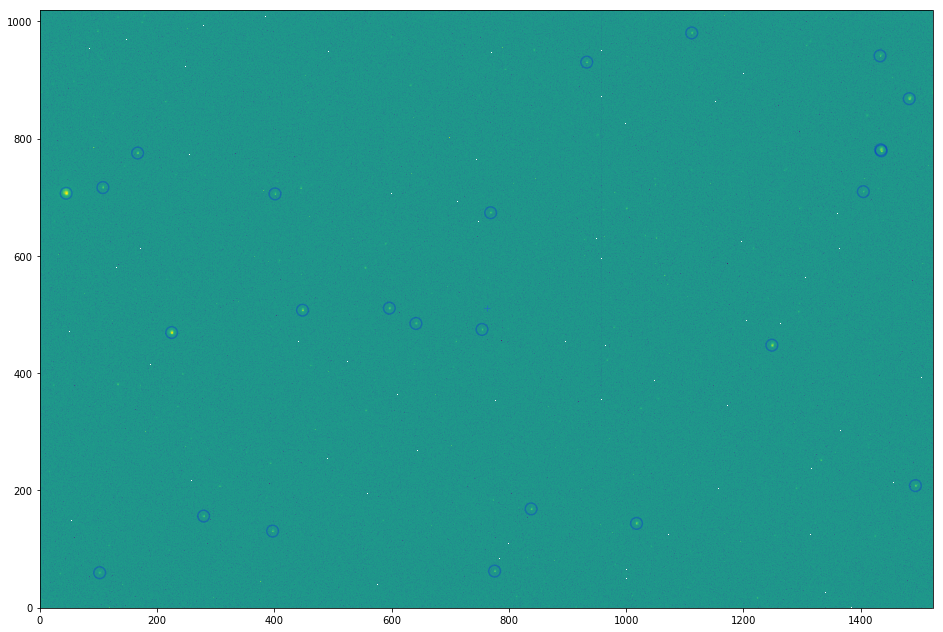

In [169]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
plt.figure(10,figsize=(16,12))
positions = (sources[sources['flux']>10]['xcentroid'], sources[sources['flux']>10]['ycentroid'])
apertures = CircularAperture(positions, r=10.)
norm = ImageNormalize()
plt.imshow(np.log(data), origin='lower', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.25)
plt.plot(phot.dic.iloc[10]['targ_pix'][0],phot.dic.iloc[10]['targ_pix'][1],'+')

In [200]:
sources['DEC']=(phot.dic.iloc[10]['targ_pix'][0]-sources['xcentroid'])*phot.dic.iloc[10]['pixscale']/3600.0+\
coor.SkyCoord(phot.dic.iloc[10]['ra'],phot.dic.iloc[10]['dec'],unit=(u.hourangle,u.deg)).dec.deg
sources['RA']=(sources['ycentroid']-phot.dic.iloc[10]['targ_pix'][1])*phot.dic.iloc[10]['pixscale']/3600.0+\
coor.SkyCoord(phot.dic.iloc[10]['ra'],phot.dic.iloc[10]['dec'],unit=(u.hourangle,u.deg)).ra.deg

In [227]:
allsrc=coor.SkyCoord(sources['RA'],sources['DEC'],unit=u.deg)
npds=np.argmin(allsrc.separation(pds110))

80.878607343629909

(81.031018123249893, 80.734302339197527)

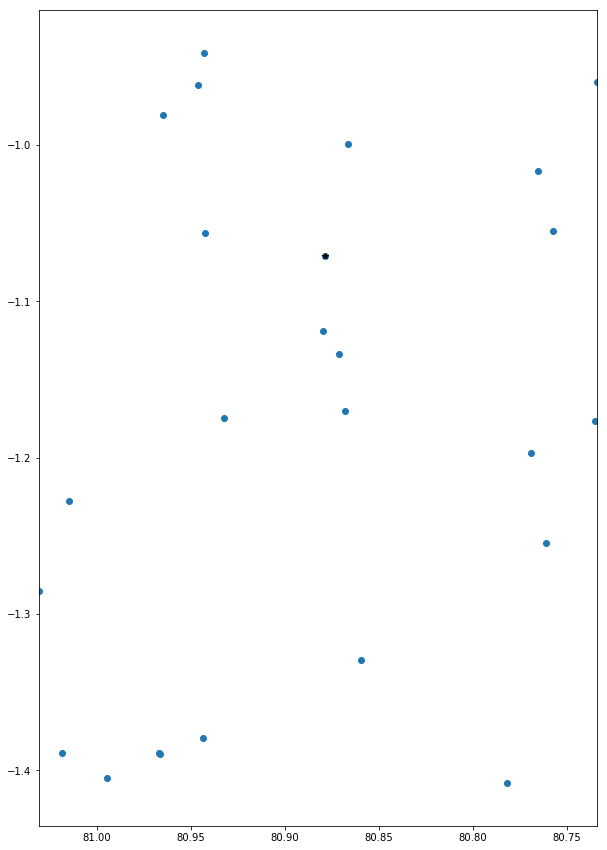

In [240]:
plt.figure(8,figsize=(10,15))
plt.scatter(sources['RA'],sources['DEC'])
plt.plot(sources[]['RA'],sources[np.argmin(allsrc.separation(pds110))]['DEC'],'*k')
plt.xlim(np.max(sources['RA']),np.min(sources['RA']))

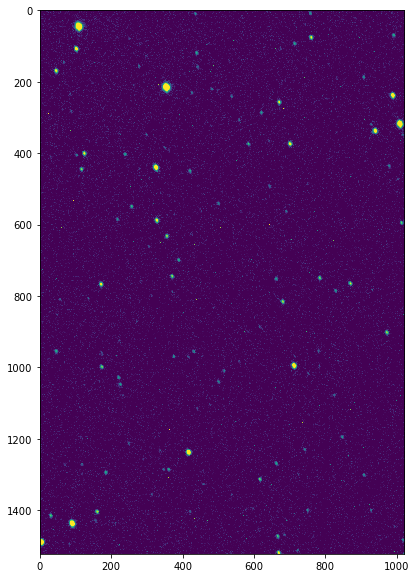

In [222]:
fig=plt.figure(12,figsize=(15,10))
ax=fig.add_subplot(1,1,1);ax.cla()
plot_lco(phot.dic.iloc[-4].img,ax)

In [213]:
phot.dic.iloc[5].img

(1020, 1523)

In [181]:
phot.dic.iloc[10]

dec                                             -01:10:20.934
defoc                                                       0
exptime                                                13.943
filename    ./images/raw/20170815/ogg0m404-kb82-20170815-1...
filt                                              PSTR-ZS-124
img         [[102.4, 84.351, 132.278, 89.2177, 55.989, 125...
name                           PDS110_JD7982.1321_PSTR-ZS-124
pixscale                                                 1.16
ra                                              05:23:31.1229
site                                                      ogg
targ_pix                                         (762, 510.5)
time                                  2017-08-16T15:10:16.712
Name: PDS110_JD7982.1321_PSTR-ZS-124, dtype: object

### Test space
I usually use the lower half of an ipynb nb for testing. You can probably ignore all of this:

In [49]:
import 
rw[1].header['DATE-OBS']

SIMPLE  =                    T / A valid FITS file                              
BITPIX  =                   16 / [bits] Bits per pixel                          
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1568 / [pixels]                                       
NAXIS2  =                 1056 / [pixels]                                       
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid

In [162]:
cref=coor.SkyCoord(80.8792178,-1.1732520,unit=u.deg)

In [356]:
cref.separation(cref).arcsec

0.0

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


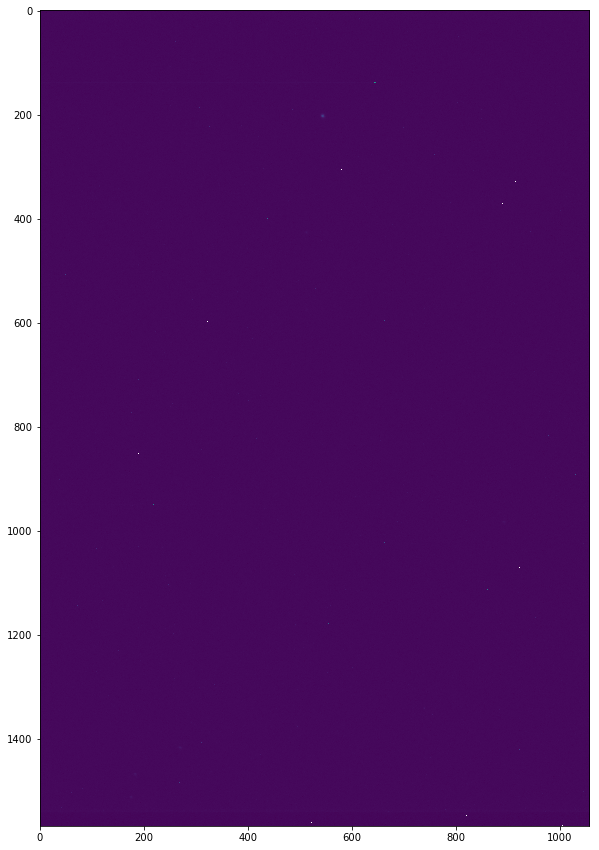

In [44]:
plt.figure(6,figsize=(10,15))
plt.imshow(np.rot90(np.sqrt(rw[1].data-0.95*np.median(rw[1].data)),k=3))

In [212]:
print(rw[1].header['CAT-RA'])
print(rw[1].header['CAT-DEC'])
print(rw[1].header['RLEVEL'])

05:23:31.012
-01:10:23.71
91


In [16]:
rw[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1523 / width of table in bytes                        
NAXIS2  =                 1020 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid